In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.2'

In [ ]:
!ls

sample_data


In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [7]:
type(data)

sklearn.utils.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
data.data.shape

(569, 30)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.33)
X_train.shape

(381, 30)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
]
)

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [28]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

print('Trian_scores:',model.evaluate(X_train,y_train))
print('Test_score:',model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 78.8805 - accuracy: 0.3570 - val_loss: 65.0026 - val_accuracy: 0.4043
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 68.8301 - accuracy: 0.3570 - val_loss: 56.3371 - val_accuracy: 0.4043
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 59.1832 - accuracy: 0.3570 - val_loss: 47.4711 - val_accuracy: 0.4043
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 49.0811 - accuracy: 0.3570 - val_loss: 38.7780 - val_accuracy: 0.4043
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 39.3291 - accuracy: 0.3570 - val_loss: 29.9443 - val_accuracy: 0.4043
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 29.3171 - accuracy: 0.3570 - val_loss: 21.1882 - val_accuracy: 0.4043
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 19.5577 - accuracy: 0.3517 - val_loss: 12.7443 - val_accuracy: 0.388

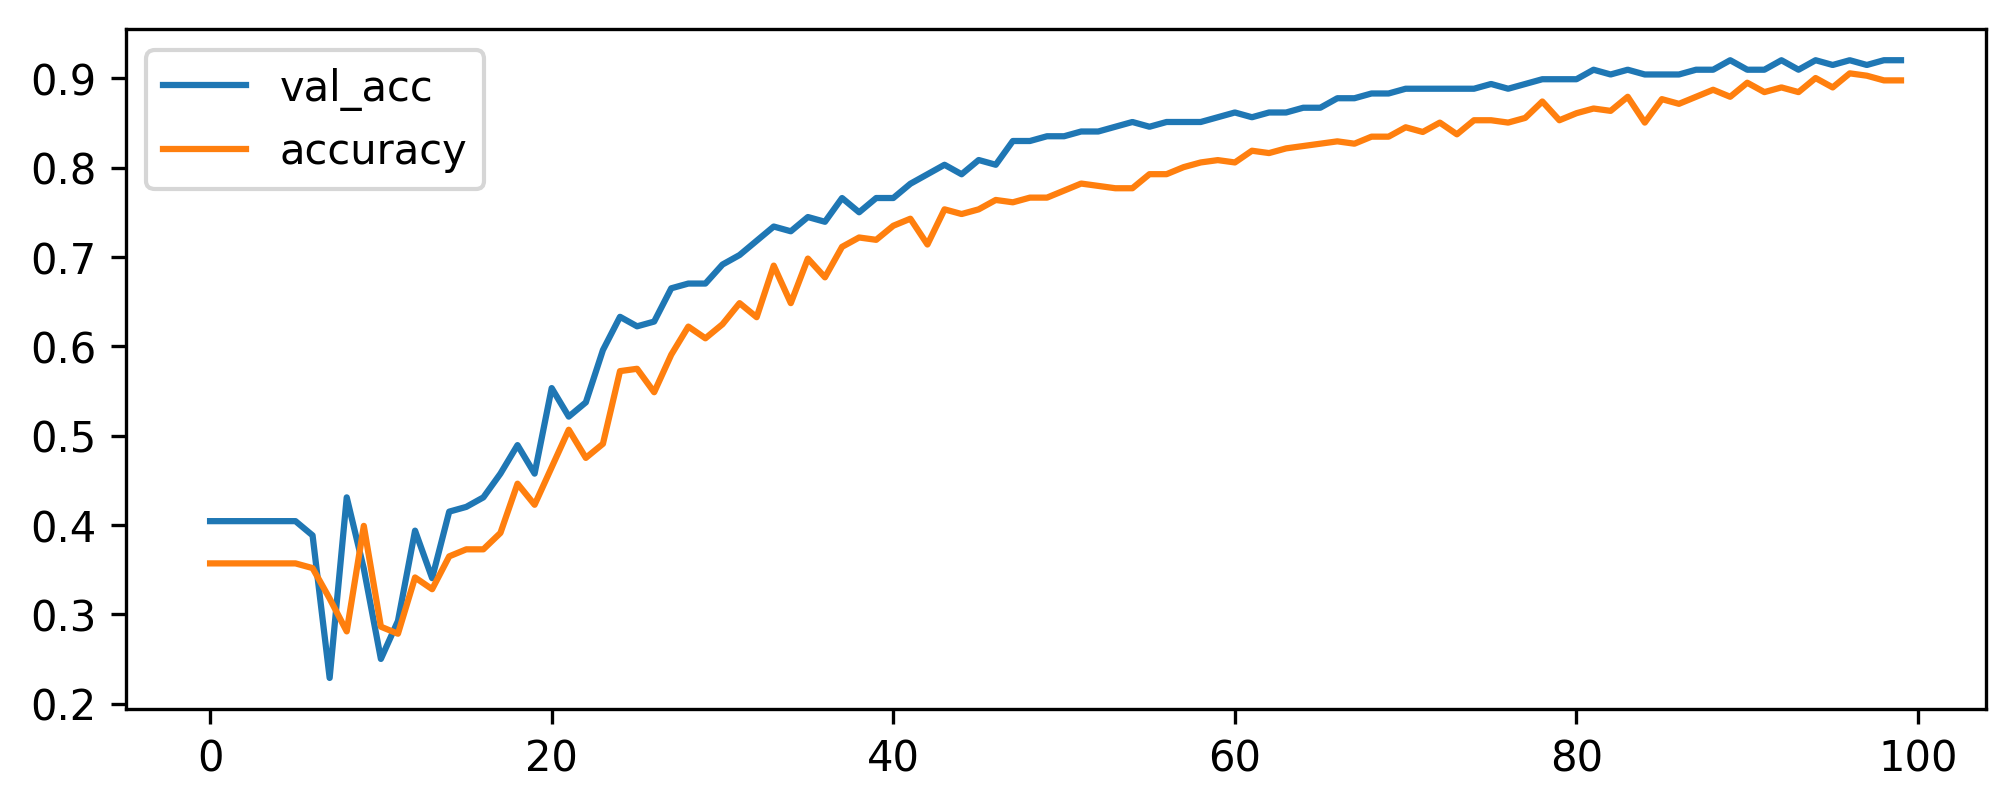

In [36]:
plt.figure(figsize=(8,3),dpi=300)
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.plot(r.history['accuracy'],label='accuracy')
plt.legend()

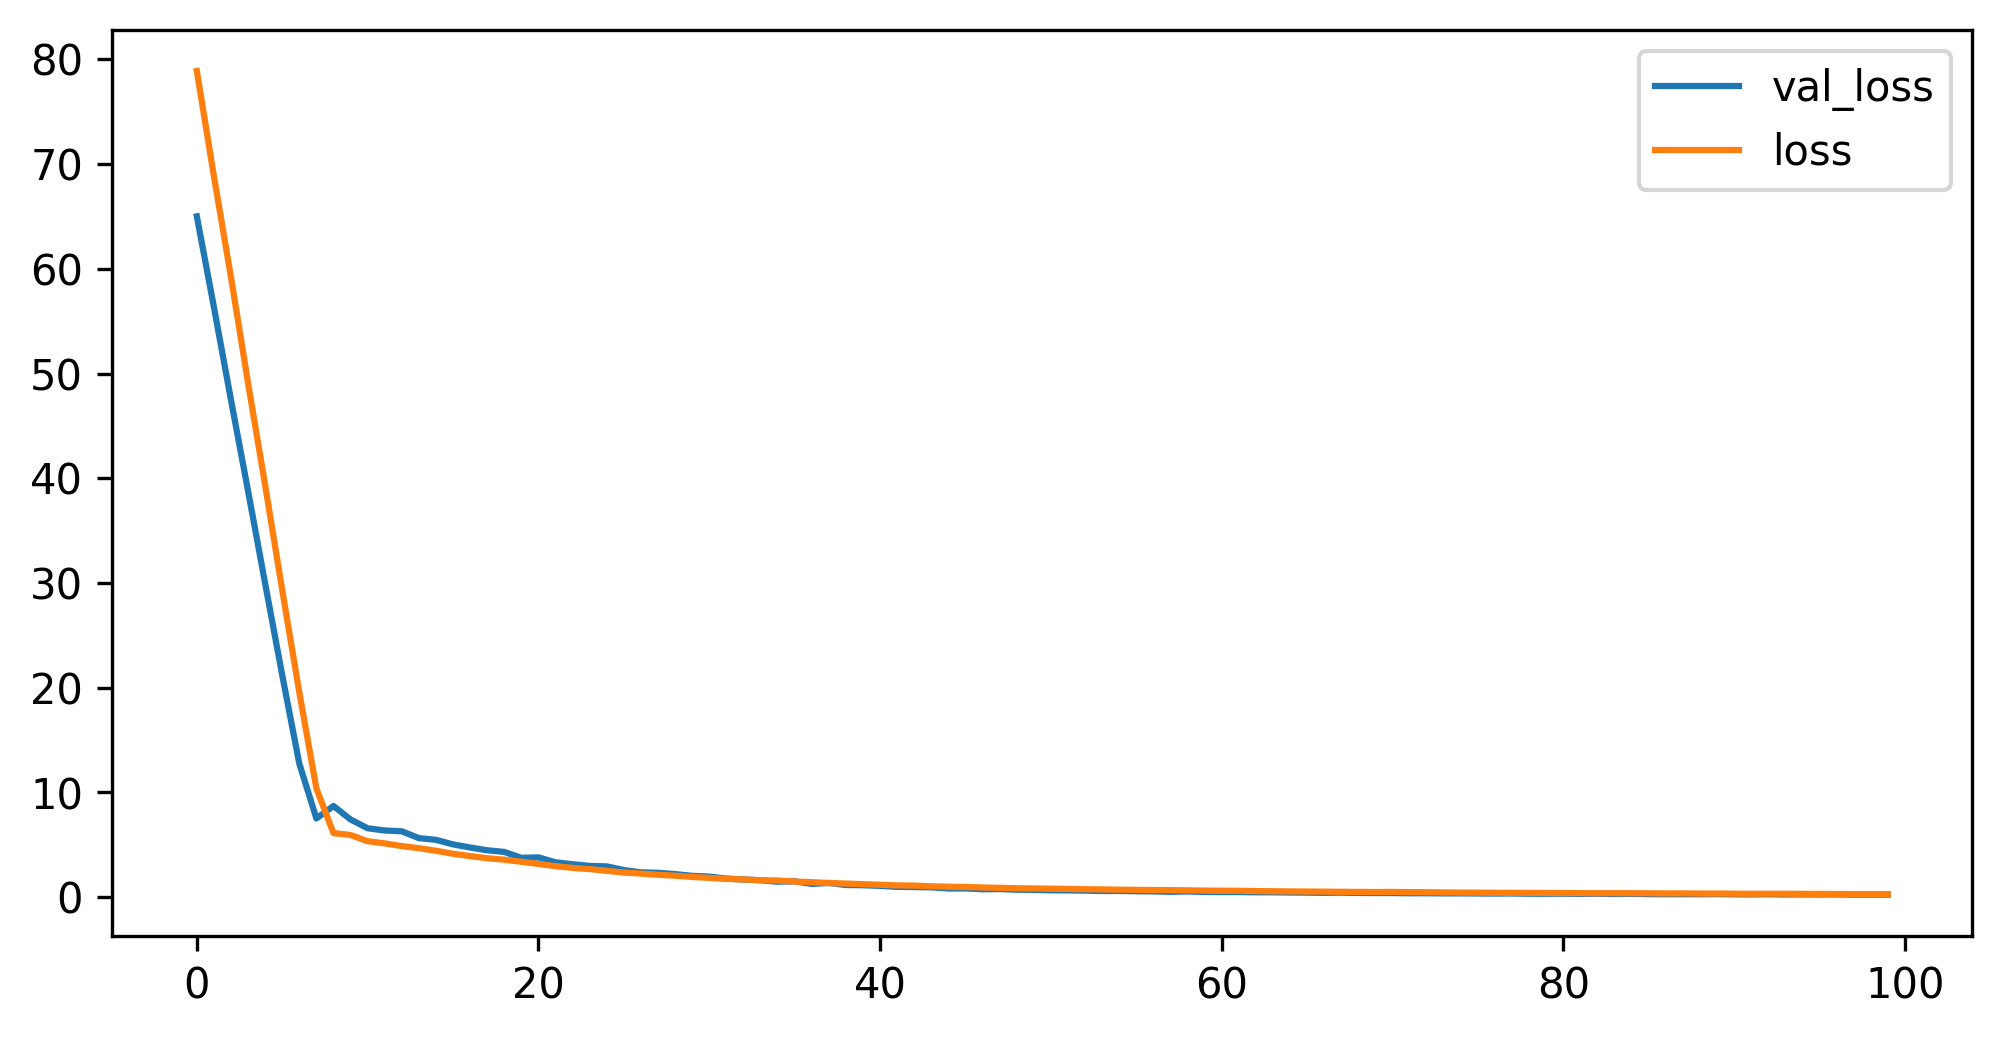

In [38]:
plt.figure(figsize=(8,4),dpi=300)
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['loss'],label='loss')
plt.legend()